## Import

In [0]:
import numpy as np
import pandas as pd

In [0]:
# pd.set_option('max_column',100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

### Data Input

In [0]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')

### Target Analysis

## EXECUTE THIS CELL

In [0]:
train['Client Retention Flag'].replace(['Yes','No'],[1,0],inplace=True)

In [0]:
train['Client Retention Flag'].mean()

0.7038558065252111

In [0]:
train['Client Retention Flag'].value_counts()

1    6170
0    2596
Name: Client Retention Flag, dtype: int64

#### Categoricals

In [0]:
categorical = train.select_dtypes(include=[np.object]).columns

In [0]:
categorical

Index(['Client Contract Starting Month', 'Flag 1', 'Flag 3', 'Flag 4',
       'Flag 6'],
      dtype='object')

## Basic Cleaning

In [0]:
merged = pd.concat([train,test])

In [0]:
def preprocessing(data):
    from sklearn.preprocessing import LabelEncoder
#     l1 = LabelEncoder()
#     data['Flag 2'] = l1.fit_transform(data['Flag 2'])
    
#     l2 = LabelEncoder()
#     data['Flag 5'] = l2.fit_transform(data['Flag 5'])
    
    l3 = LabelEncoder()
    data['Flag 6'] = l3.fit_transform(data['Flag 6'])
    
    l4 = LabelEncoder()
    data['Client Contract Starting Month'] = l3.fit_transform(data['Client Contract Starting Month'])
    
    data['Flag 1'].replace(['Single Year','Multi Year'],[0,1],inplace=True)
    data['Flag 3'].replace(['Yes','No','C'],[1,0,1],inplace=True)
    data['Flag 4'].replace(['Yes','Unknown','No'],[1,0,0],inplace=True)
    

In [0]:
train.columns

Index(['Client ID', 'Company ID', 'Client Contract Starting Month', 'Flag 1',
       'Flag 2', 'Flag 3', 'Flag 4', 'Flag 5', 'Flag 6',
       'Activity 1 Time Period 11',
       ...
       'Activity 8 Time Period 8', 'Activity 8 Time Period 7',
       'Activity 8 Time Period 6', 'Activity 8 Time Period 5',
       'Activity 8 Time Period 4', 'Activity 8 Time Period 3',
       'Activity 8 Time Period 2', 'Activity 8 Time Period 1',
       'Activity 8 Time Period 0', 'Client Retention Flag'],
      dtype='object', length=106)

In [0]:
preprocessing(merged)

In [0]:
# merged = pd.get_dummies(merged,columns=['Client Contract Starting Month'])

In [0]:
train_col_order = train.columns
test_col_order = test.columns

In [0]:
train = merged[0:8766]
test = merged[8766:]

train = train[train_col_order]
test = test[test_col_order]

In [0]:
train_orig = train.copy()
test_orig = test.copy()

In [0]:
### create diffrent set of data points having all zeros or mostly zeros in activity 1, see if we can make separate decisions for them

In [0]:
train_orig.columns

Index(['Client ID', 'Company ID', 'Client Contract Starting Month', 'Flag 1',
       'Flag 2', 'Flag 3', 'Flag 4', 'Flag 5', 'Flag 6',
       'Activity 1 Time Period 11',
       ...
       'Activity 8 Time Period 8', 'Activity 8 Time Period 7',
       'Activity 8 Time Period 6', 'Activity 8 Time Period 5',
       'Activity 8 Time Period 4', 'Activity 8 Time Period 3',
       'Activity 8 Time Period 2', 'Activity 8 Time Period 1',
       'Activity 8 Time Period 0', 'Client Retention Flag'],
      dtype='object', length=106)

In [0]:
categorical

Index(['Client Contract Starting Month', 'Flag 1', 'Flag 3', 'Flag 4',
       'Flag 6'],
      dtype='object')

###

1. So we have around 106 features, most of them are sparse.
2. The primary approach is to remove all the activities features and using the rest
3. Once the baseline is established with these features, we will try the following experiment
4. Experiments to conduct
    1. Drop the whole activity features matrix if more than half of its child features have zeros >80%
        e.g. We drop Activity 8 features, as most of them have 90% zeros
    2. Second option is to use dimentionality reduction, using PCA (but using methods to handle sparse data)
    3. Trying PCA, checking visualizations to validate the strategy
    
    4. Totally starange approach, simply adding activity features horizontally, and using it as a feature, checking its visualizations as well

### Exporing the remove option, and the sum option 

###### Features to remove - 
1. Activity 3, 5,6,7,8
2. 2nd experiment by using just their sum instead

In [0]:
f1 = train.loc[:,'Activity 1 Time Period 11':'Activity 1 Time Period 0']
f2 = train.loc[:,'Activity 2 Time Period 11':'Activity 2 Time Period 0']
f3 = train.loc[:,'Activity 3 Time Period 11':'Activity 3 Time Period 0']
f4 = train.loc[:,'Activity 4 Time Period 11':'Activity 4 Time Period 0']
f8 = train.loc[:,'Activity 8 Time Period 11':'Activity 8 Time Period 0']


f5 = train.loc[:,'Activity 5 Time Period  11':'Activity 5 Time Period  0']
f6 = train.loc[:,'Activity 6 Time Period  11':'Activity 6 Time Period  0']
f7 = train.loc[:,'Activity 7 Time Period  11':'Activity 7 Time Period  0']



f1_test = test.loc[:,'Activity 1 Time Period 11':'Activity 1 Time Period 0']
f2_test = test.loc[:,'Activity 2 Time Period 11':'Activity 2 Time Period 0']
f3_test = test.loc[:,'Activity 3 Time Period 11':'Activity 3 Time Period 0']
f4_test = test.loc[:,'Activity 4 Time Period 11':'Activity 4 Time Period 0']
f8_test = test.loc[:,'Activity 8 Time Period 11':'Activity 8 Time Period 0']


f5_test = test.loc[:,'Activity 5 Time Period  11':'Activity 5 Time Period  0']
f6_test = test.loc[:,'Activity 6 Time Period  11':'Activity 6 Time Period  0']
f7_test = test.loc[:,'Activity 7 Time Period  11':'Activity 7 Time Period  0']

### Quaterly features

In [0]:
np.corrcoef(np.absolute(f1.iloc[:,0:3].sum(axis=1)),train['Client Retention Flag'])

array([[1.        , 0.11112903],
       [0.11112903, 1.        ]])

Hmmm, Seems like a good correlation

In [0]:
def create_quarter(data,m1=None,m2=None):
    name= 'activiy_1_sum_month_' + str(m1)+'_'+str(m2)
    m1_loc = 12 - m1
    m2_loc = 12 - m2
    data[name] = f1.iloc[:,m2_loc:m1_loc].sum(axis=1)
    data[name+'_max'] = f1.iloc[:,m2_loc:m1_loc].max(axis=1)
    data[name+'_var'] = f1.iloc[:,m2_loc:m1_loc].var(axis=1)

#### Quarter features didnt really improve the perfromance, so decided not to use them

In [0]:
# # for activity one only
# create_quarter(train,m1=1,m2=3)
# create_quarter(train,m1=4,m2=6)
# create_quarter(train,m1=7,m2=9)
# create_quarter(train,m1=10,m2=12)

In [0]:
# create_quarter(test,m1=1,m2=3)
# create_quarter(test,m1=4,m2=6)
# create_quarter(test,m1=7,m2=9)
# create_quarter(test,m1=10,m2=12)

In [0]:
# train['quarter_1_2_residual'] = np.absolute(train['activiy_1_sum_month_1_3'] - train['activiy_1_sum_month_4_6'])
# train['quarter_2_3_residual'] = np.absolute(train['activiy_1_sum_month_4_6'] - train['activiy_1_sum_month_7_9'])
# train['quarter_3_4_residual'] = np.absolute(train['activiy_1_sum_month_7_9'] - train['activiy_1_sum_month_10_12'])

In [0]:
# test['quarter_1_2_residual'] = np.absolute(test['activiy_1_sum_month_1_3'] - test['activiy_1_sum_month_4_6'])
# test['quarter_2_3_residual'] = np.absolute(test['activiy_1_sum_month_4_6'] - test['activiy_1_sum_month_7_9'])
# test['quarter_3_4_residual'] = np.absolute(test['activiy_1_sum_month_7_9'] - test['activiy_1_sum_month_10_12'])

### Statistical features

In [0]:
def create_stats(data, activity=None, which_activity_df = None):
    f = which_activity_df
    data['activity_'+str(activity)+'_mean'] = data.loc[:,f.columns].mean(axis=1)
    data['activity_'+str(activity)+'_max'] = data.loc[:,f.columns].max(axis=1)
    if activity == 1:
        data['activity_'+str(activity)+'_var'] = data.loc[:,f.columns].var(axis=1)
        data['activity_'+str(activity)+'_zeros'] = -(data.loc[:,f.columns]==0).sum(axis=1)       

In [0]:
create_stats(train, activity=1, which_activity_df=f1)
create_stats(train, activity=2, which_activity_df=f2)
create_stats(train, activity=3, which_activity_df=f3)
create_stats(train, activity=4, which_activity_df=f4)
# create_stats(train, activity=5, which_activity_df=f5)
# create_stats(train, activity=6, which_activity_df=f6)
# create_stats(train, activity=7, which_activity_df=f7)
# create_stats(train, activity=8, which_activity_df=f8)


create_stats(test, activity=1, which_activity_df=f1_test)
create_stats(test, activity=2, which_activity_df=f2_test)
create_stats(test, activity=3, which_activity_df=f3_test)
create_stats(test, activity=4, which_activity_df=f4_test)
# create_stats(test, activity=5, which_activity_df=f5)
# create_stats(test, activity=6, which_activity_df=f6)
# create_stats(test, activity=7, which_activity_df=f7)
# create_stats(test, activity=8, which_activity_df=f8)

#### This feature set indeed improved the performance

## Data Expermiments

In [0]:
train_new = train.drop(train.loc[:,'Activity 5 Time Period  11':'Activity 8 Time Period 0'].columns,axis=1)
train_new = train_new.drop(train_new.loc[:,'Activity 3 Time Period 11':'Activity 3 Time Period 0'].columns,axis=1)

In [0]:
test_new = test.drop(train.loc[:,'Activity 5 Time Period  11':'Activity 8 Time Period 0'].columns,axis=1)
test_new = test_new.drop(test_new.loc[:,'Activity 3 Time Period 11':'Activity 3 Time Period 0'].columns,axis=1)

In [0]:
train_exp_3.columns

Index(['Client ID', 'Company ID', 'Client Contract Starting Month', 'Flag 1',
       'Flag 2', 'Flag 3', 'Flag 4', 'Flag 5', 'Flag 6',
       'Activity 1 Time Period 11', 'Activity 1 Time Period 10',
       'Activity 1 Time Period 9', 'Activity 1 Time Period 8',
       'Activity 1 Time Period 7', 'Activity 1 Time Period 6',
       'Activity 1 Time Period 5', 'Activity 1 Time Period 4',
       'Activity 1 Time Period 3', 'Activity 1 Time Period 2',
       'Activity 1 Time Period 1', 'Activity 1 Time Period 0',
       'Client Retention Flag', 'activity_1_mean', 'activity_1_max',
       'activity_1_var', 'activity_1_zeros', 'activity_2_mean',
       'activity_2_max', 'activity_3_mean', 'activity_3_max',
       'activity_4_mean', 'activity_4_max', 'activity_2_sum', 'activity_4_sum',
       'Activity 1 residual 2', 'Activity 1 residual 3',
       'Activity 1 residual 4', 'Activity 1 residual 5',
       'Activity 1 residual 6', 'Activity 1 residual 7',
       'Activity 1 residual 8', 'Activi

### SUM option for less popular activities

##### NOTE that, we need to create features considering domain knowledge, and by leveraging maximum customer interaction, to understand their behaviour. If the sum approach doesnt work out we need to consider different hypothesis

In [0]:
train_exp_3 =  train_new.copy()

In [0]:
train_exp_3['activity_2_sum'] = train_exp_3.loc[:,'Activity 2 Time Period 11':'Activity 2 Time Period 0'].sum(axis=1)
train_exp_3.drop(train_exp_3.loc[:,'Activity 2 Time Period 11':'Activity 2 Time Period 0'].columns,axis=1,inplace=True)

train_exp_3['activity_4_sum'] = train_exp_3.loc[:,'Activity 4 Time Period 11':'Activity 4 Time Period 0'].sum(axis=1)
train_exp_3.drop(train_exp_3.loc[:,'Activity 4 Time Period 11':'Activity 4 Time Period 0'].columns,axis=1,inplace=True)


### RESIDUAL DF

In [0]:
residual_df = pd.DataFrame()
for i in range(2,12):#train_exp_3.loc[:,'Activity 1 Time Period 11':'Activity 1 Time Period 10'].columns:
    a = 'Activity 1 Time Period'+ ' '+str(i)
    b = 'Activity 1 Time Period'+ ' '+str(i-1)
    name = 'Activity 1 residual'+ ' '+str(i)
    residual_df[name] = (train_exp_3[a]-train_exp_3[b])
    

train_exp_3 = pd.concat([train_exp_3,np.absolute(residual_df)],axis=1)

### Residual DF month_sum feature
Discarded features

In [0]:
# residual_df_2 = pd.DataFrame()
# for i in range(1,12):#train_exp_3.loc[:,'Activity 1 Time Period 11':'Activity 1 Time Period 10'].columns:
#     a = 'month_'+str(i)+'_total'
#     b = 'month_'+str(i-1)+'_total'
#     name = 'month residual'+ '_'+str(i)
#     residual_df_2[name] = (train_exp_3[a]-train_exp_3[b])
    

# train_exp_3 = pd.concat([train_exp_3,(residual_df_2)],axis=1)

In [0]:
# count = 0
# done_list  = []
# plt.figure(figsize=(12,12))
# for i in residual_df.columns:
#     if count<9:
#         count+=1
#         plt.subplot(int(str(33)+str(count)))
#         df = residual_df.dropna()
#         sns.scatterplot(df[i],train_exp_3['Client Retention Flag'])
#         plt.title(i)
#         done_list.append(i)
# plt.show()

In [0]:
# for i in residual_df.columns:
#         print(i,'\n', residual_df[i].describe(),'\n')

In [0]:
# for i in residual_df.columns:
#     stats = residual_df[i].describe()
#     lele_feature = (np.absolute(residual_df[i])>((np.absolute(stats['25%'])+np.absolute(stats['75%']))/2)).astype(int)
#     print(i,'\n', np.corrcoef(train_exp_3['Client Retention Flag'],lele_feature),'\n')
    
#     feature_name = i + '_lele'
#     train_exp_3[feature_name] = lele_feature

### MARGINAL DF
Discarded features

In [0]:
# margin_df = pd.DataFrame()
# for i in range(2,12):#train_exp_3.loc[:,'Activity 1 Time Period 11':'Activity 1 Time Period 10'].columns:
#     a = 'Activity 1 Time Period'+ ' '+str(i)
#     mean = 'activity_1_mean'
#     max = 'activity_1_max'
    
#     name_mean = 'Activity 1 margin from mean'+ ' '+str(i)
#     name_max = 'Activity 1 margin from max'+ ' '+str(i)
    
#     margin_df[name_mean] = (train_exp_3[mean]-train_exp_3[a])
#     margin_df[name_max] = (train_exp_3[max]-train_exp_3[a])
    
#     ### tried one hypothesis, doesnt make any impact on model, need to think more

In [0]:
# train_exp_3 = pd.concat([train_exp_3,np.absolute(margin_df)],axis=1)

In [0]:
# count = 0
# done_list  = []
# plt.figure(figsize=(12,12))
# for i in margin_df.columns:
#     if count<9:
#         count+=1
#         plt.subplot(int(str(33)+str(count)))
#         df = margin_df.dropna()
#         sns.scatterplot(df[i],train_exp_3['Client Retention Flag'])
#         plt.title(i)
#         done_list.append(i)
# plt.show()

In [0]:
# for i in margin_df.columns:
#     stats = margin_df[i].describe()
#     lele_feature = (np.absolute(margin_df[i])>((np.absolute(stats['25%'])+np.absolute(stats['75%']))/2)).astype(int)
#     print(i,'\n', np.corrcoef(train_exp_3['Client Retention Flag'],lele_feature),'\n')
    
#     feature_name = i + '_lele'
#     train_exp_3[feature_name] = lele_feature

# kuch kaam ke nahi

In [0]:
# train_exp_3.drop(margin_df.columns,axis=1,inplace=True)

In [0]:
# sum = train_exp_3.loc[:,'Activity 1 margin from mean 2_lele':'Activity 1 margin from max 11_lele'].sum(axis=1)
# train_exp_3['margin_sum'] = sum
# redundant hai ye!

#######

In [0]:

# train_exp_3['zero_indicator'] = np.exp((train_exp_3['activity_1_zeros']*-1))
# ## bad features, its decreasing the leaderboard score

In [0]:
# sns.boxplot(y = train_exp_3['zero_indicator'],x = train_exp_3['Client Retention Flag'])

## Validation

In [0]:
from sklearn.model_selection import train_test_split
x_t,x_v,y_t,y_v = train_test_split(train_exp_3.drop(['Client ID','Company ID','Client Retention Flag'],axis=1),train_exp_3['Client Retention Flag'],test_size=0.2,random_state=12324)

#### Used this for feature elimination

In [0]:
# from sklearn.feature_selection import RFE
# estimator = RandomForestClassifier(n_estimators=100)
# selector  = RFE(estimator,n_features_to_select=10,verbose=2)
# selector.fit(x_t,y_t)

# features_select = pd.Series(selector.ranking_)
# fe_indices = features_select[features_select==1].index

# # x_t = x_t.loc[:,x_t.columns[fe_indices]]
# # x_v = x_v.loc[:,x_v.columns[fe_indices]]

#### Parameters to be used

In [0]:


params = {'n_estimators':532,'max_depth': 25, 'num_leaves': 6, 'min_child_samples': 20, 
                         'scale_pos_weight': 1.0, 'subsample': 0.9, 'colsample_bytree': 0.9, 'metric': 'auc', 
                         'nthread': 8, 'boosting_type': 'gbdt', 'objective': 'binary', 'learning_rate': 0.22122922613516072, 'max_bin': 100, 'min_child_weight': 0, 'min_split_gain': 0, 'subsample_freq': 1}


In [0]:
%%time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier## it doesnt work on this machine, 4GB RAM, we shoiuld try out on 8GB RAM
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

model = LGBMClassifier(**params)
model.fit(x_t,y_t)

print('Training score', model.score(x_t,y_t))
print('Validation score', np.mean(model.predict(x_v) == y_v))

Training score 0.9751853964632059
Validation score 0.8899657924743444
CPU times: user 2.51 s, sys: 86.4 ms, total: 2.6 s
Wall time: 3.51 s


In [0]:
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.22122922613516072,
               max_bin=100, max_depth=25, metric='auc', min_child_samples=20,
               min_child_weight=0, min_split_gain=0, n_estimators=532,
               n_jobs=-1, nthread=8, num_leaves=6, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1.0, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=1)

In [0]:
np.mean(model.predict(x_t)==y_t)

0.9751853964632059

#### Necessary metrics

In [0]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve
preds = model.predict(x_v)
probabs = model.predict_proba(x_v)[::,1]

print('F1 Score', f1_score(y_v,preds))
print('ROC AUC Score', roc_auc_score(y_v,probabs))
print(confusion_matrix(y_v,preds))

F1 Score 0.9244618395303326
ROC AUC Score 0.948188720938433
[[ 380  135]
 [  58 1181]]


In [0]:
tn, fp, fn, tp = confusion_matrix(y_v, preds).ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
print('specificity {}, sensitivity {}'.format(specificity,sensitivity))

specificity 0.7378640776699029, sensitivity 0.8974164133738601


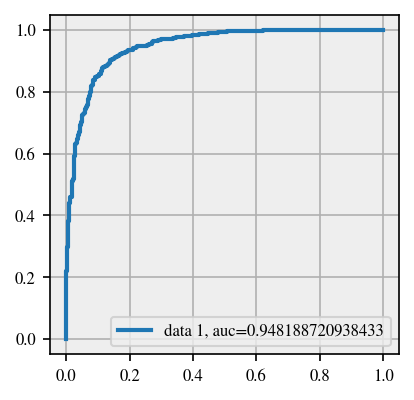

In [0]:
plt.figure(figsize=(3,3))
fpr, tpr, _ = roc_curve(y_v,probabs)
auc = roc_auc_score(y_v,probabs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
print(confusion_matrix(y_v,probabs>0.55))
# f1_score(y_v,probabs>0.5,average='weighted')
f1_score(y_v,probabs>0.55)

[[ 399  116]
 [  64 1175]]


0.9288537549407114

##### We can think about changing the threshold

#### Feature Importance

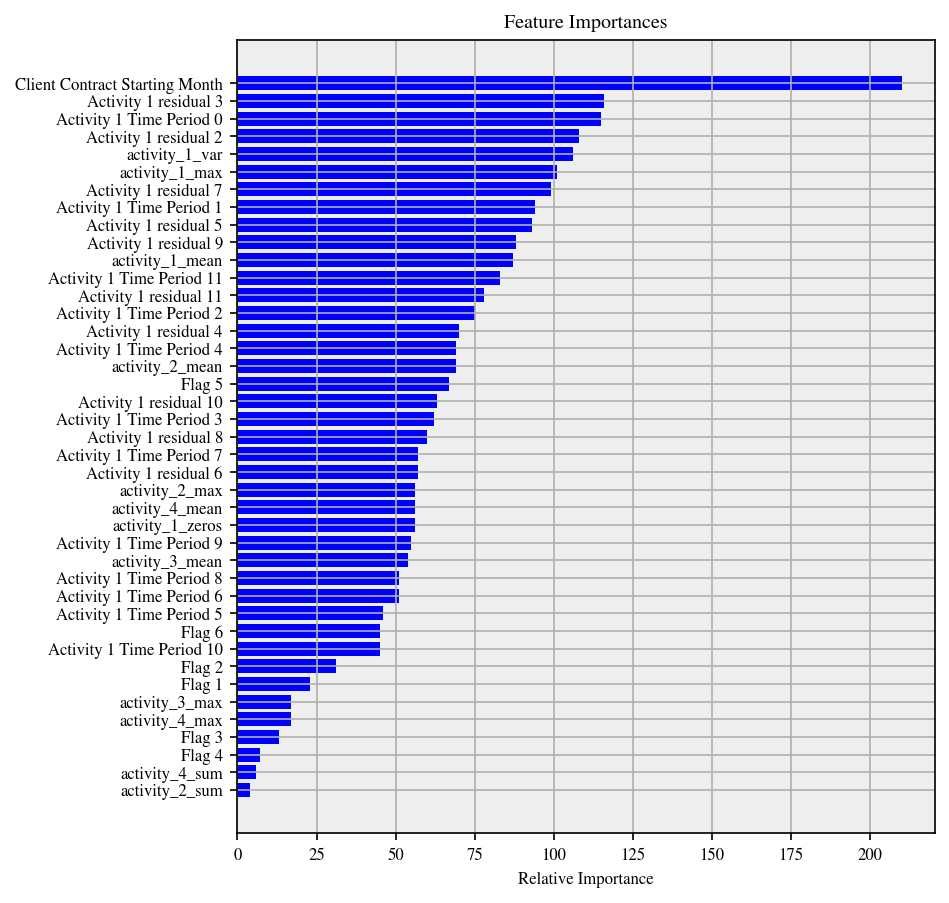

In [0]:
features = x_t.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## K fold Validation

### we need to prepare the test data as well

In [0]:
test_new['activity_2_sum'] = test_new.loc[:,'Activity 2 Time Period 11':'Activity 2 Time Period 0'].sum(axis=1)
test_new.drop(test_new.loc[:,'Activity 2 Time Period 11':'Activity 2 Time Period 0'].columns,axis=1,inplace=True)

test_new['activity_4_sum'] = test_new.loc[:,'Activity 4 Time Period 11':'Activity 4 Time Period 0'].sum(axis=1)
test_new.drop(test_new.loc[:,'Activity 4 Time Period 11':'Activity 4 Time Period 0'].columns,axis=1,inplace=True)


In [0]:
residual_df_test = pd.DataFrame()
for i in range(2,12):#train_exp_3.loc[:,'Activity 1 Time Period 11':'Activity 1 Time Period 10'].columns:
    a = 'Activity 1 Time Period'+ ' '+str(i)
    b = 'Activity 1 Time Period'+ ' '+str(i-1)
    name = 'Activity 1 residual'+ ' '+str(i)
    residual_df_test[name] = (test_new[a]-test_new[b])

    
test_new = pd.concat([test_new,np.absolute(residual_df_test)],axis=1)

In [0]:
X = train_exp_3.drop(['Client ID','Company ID','Client Retention Flag'],axis=1)
y = train_exp_3['Client Retention Flag']

Xtest = test_new.drop(['Client ID','Company ID'],axis=1)


### Training

In [0]:
from sklearn.model_selection import StratifiedKFold
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [0]:
f1_scores = []
y_pred_test_probab = []
y_pred_test_absolute = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y.loc[train_index], y.loc[test_index]
    
    model = LGBMClassifier(**params)
    model.fit(X_train,y_train)
    
    preds = model.predict(X_valid)
    probabs = model.predict_proba(X_valid)[::,1]

    f1_scores.append(f1_score(preds,y_valid))
    
    print('Training score', model.score(X_train,y_train))
    print('Validation score', np.mean(model.predict(X_valid) == y_valid))
    print('F1 Score', f1_score(preds,y_valid))
    print('ROC AUC Score', roc_auc_score(y_valid,probabs))
    print(confusion_matrix(y_valid,preds))
    print('\n')
    
    abs_pred = model.predict(Xtest)
    y_pred_test_absolute.append(abs_pred)
    
    test_probab = model.predict_proba(Xtest)[:,-1]
    y_pred_test_probab.append(test_probab)

[Fold 1/5]
Training score 0.976468910439247
Validation score 0.879133409350057
F1 Score 0.9175097276264592
ROC AUC Score 0.9206645056726094
[[ 363  157]
 [  55 1179]]


[Fold 2/5]
Training score 0.9739056038785113
Validation score 0.8876212207644039
F1 Score 0.9229565897536174
ROC AUC Score 0.9329982543415057
[[ 376  143]
 [  54 1180]]


[Fold 3/5]
Training score 0.9751889348353059
Validation score 0.8881916714204221
F1 Score 0.9234972677595628
ROC AUC Score 0.9378839121487214
[[ 374  145]
 [  51 1183]]


[Fold 4/5]
Training score 0.9770426351062312
Validation score 0.8830576155162578
F1 Score 0.919449901768173
ROC AUC Score 0.9314071756244866
[[ 378  141]
 [  64 1170]]


[Fold 5/5]
Training score 0.9766148581206331
Validation score 0.87906446092413
F1 Score 0.9173166926677067
ROC AUC Score 0.9316616857627341
[[ 365  154]
 [  58 1176]]




In [0]:
print(confusion_matrix(y_valid,probabs>0.63))
f1_score(y_valid,probabs>0.63)

[[ 399  120]
 [  87 1147]]


0.917233106757297

In [0]:
np.mean(f1_scores)

0.9201460359151039

In [0]:
test_output_probabs = pd.DataFrame(np.mean(y_pred_test_probab,0).T)
(test_output_probabs>0.5).mean()

0    0.763845
dtype: float64

In [0]:
np.mean(y_pred_test_absolute,0)

array([1. , 1. , 1. , ..., 0.4, 1. , 1. ])

## Voting ensemble

In [0]:
params1 = {'n_estimators':1000,'max_depth': -1, 'num_leaves': 6, 'min_child_samples': 20, 
          'scale_pos_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.6, 
          'metric': 'auc', 'nthread': 8, 'boosting_type': 'gbdt',
          'objective': 'binary', 'learning_rate': 0.16951060565909368, 
          'max_bin': 100, 'min_child_weight': 0, 'min_split_gain': 0, 'subsample_freq': 1}
#
params2 = {'n_estimators':532,'max_depth': 25, 'num_leaves': 6, 'min_child_samples': 20, 
                         'scale_pos_weight': 1.0, 'subsample': 0.9, 'colsample_bytree': 0.9, 'metric': 'auc', 
                         'nthread': 8, 'boosting_type': 'gbdt', 'objective': 'binary', 'learning_rate': 0.22122922613516072, 'max_bin': 100, 'min_child_weight': 0, 'min_split_gain': 0, 'subsample_freq': 1}

params3 = {'n_estimators':3000,'max_depth': -1, 'num_leaves': 6, 'min_child_samples': 20, 
                         'scale_pos_weight': 1.0, 'subsample': 0.9, 'colsample_bytree': 0.9, 'metric': 'auc', 
                         'nthread': 8, 'boosting_type': 'gbdt', 'objective': 'binary', 'learning_rate': 0.022122922613516072, 'max_bin': 100, 'min_child_weight': 0, 'min_split_gain': 0, 'subsample_freq': 1}



In [0]:
lgb1 = LGBMClassifier(**params1)
lgb2 = LGBMClassifier(**params2)
lgb3 = LGBMClassifier(**params3)

In [0]:
lgb1.fit(x_t,y_t)
lgb2.fit(x_t,y_t)
lgb3.fit(x_t,y_t)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.02212292261351607,
               max_bin=100, max_depth=-1, metric='auc', min_child_samples=20,
               min_child_weight=0, min_split_gain=0, n_estimators=3000,
               n_jobs=-1, nthread=8, num_leaves=6, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1.0, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=1)

In [0]:
print(lgb1.score(x_v,y_v), lgb2.score(x_v,y_v),lgb3.score(x_v,y_v))

0.8928164196123147 0.8899657924743444 0.887115165336374


In [0]:
probabs1 = lgb1.predict_proba(x_v)[::,1]
probabs2 = lgb2.predict_proba(x_v)[::,1]
probabs3 = lgb3.predict_proba(x_v)[::,1]

In [0]:
ensemble = pd.DataFrame()
ensemble['probabs1'] = probabs1
ensemble['probabs2'] = probabs2
ensemble['probabs3'] = probabs3

In [0]:
weighted_ensemble = probabs1*0.4+probabs2*0.3+probabs3*0.3

In [0]:
def make_preds(preds,threshold=0.5):
    predictions = (preds>threshold).astype(int)
    return predictions

In [0]:
np.mean(make_preds(weighted_ensemble,0.5)==y_v)

0.8945267958950969

In [0]:
f1_score(make_preds(weighted_ensemble,0.5),y_v)

0.9278189621537262

In [0]:
preds_1 = make_preds(weighted_ensemble,0.5)

In [0]:
tn, fp, fn, tp = confusion_matrix(y_v, preds_1).ravel()
specificity = tn / (tn+fp)
sensitivity = tp/(tp+fp)
print('specificity {}, sensitivity {}'.format(specificity,sensitivity))

specificity 0.7378640776699029, sensitivity 0.898036253776435


## Test Preds

In [0]:
lgb1.fit(X,y)
lgb2.fit(X,y)
lgb3.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.02212292261351607,
               max_bin=100, max_depth=-1, metric='auc', min_child_samples=20,
               min_child_weight=0, min_split_gain=0, n_estimators=3000,
               n_jobs=-1, nthread=8, num_leaves=6, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=1.0, silent=True, subsample=0.9,
               subsample_for_bin=200000, subsample_freq=1)

In [0]:
probabs1_test = lgb1.predict_proba(Xtest)[::,1]
probabs2_test = lgb2.predict_proba(Xtest)[::,1]
probabs3_test = lgb3.predict_proba(Xtest)[::,1]

In [0]:
weighted_ensemble_test = probabs1_test*0.4+probabs2_test*0.3+probabs3_test*0.3

### Submission

#### General approach

In [0]:
# model_sub =LGBMClassifier(**params)
# model_sub.fit(X,y)

# model_sub.booster_.save_model('./models/model_LGBM(500)_Residual_activity_1')
# model_sub.score(X,y)

In [0]:
# submission =model_sub.predict(Xtest)#(test_output_probabs>0.5).astype(int)(probabs_sub>0.5).astype(int)#


#### Using weighted ensemble model for final submission

In [0]:
submission =make_preds(weighted_ensemble_test,threshold=0.5)

In [0]:
subs = pd.DataFrame(test_new['Client ID'])
subs['Client Retention Flag'] = submission
subs['Client Retention Flag'].replace([1,0],['Yes','No'],inplace=True)

In [0]:
subs.to_csv('Submission.csv', index=False, header=True) #  weighted ensemble, boom got increament till 0.8850